# Import Packages

In [1]:
#### Loading the packages to be used
from __future__ import print_function  # Python 2 and 3
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import pickle

# Load dataset


In [2]:
train = pd.read_csv('train.csv')
with open('cleaned_df.pkl', 'rb') as f:
    df = pickle.load(f)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NoAlley,Reg,Lvl,AllPub,Inside,...,0,0,NoPool,NoFen,NoMF,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NoAlley,Reg,Lvl,AllPub,FR2,...,0,0,NoPool,NoFen,NoMF,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NoAlley,IR1,Lvl,AllPub,Inside,...,0,0,NoPool,NoFen,NoMF,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NoAlley,IR1,Lvl,AllPub,Corner,...,0,0,NoPool,NoFen,NoMF,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NoAlley,IR1,Lvl,AllPub,FR2,...,0,0,NoPool,NoFen,NoMF,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NoAlley,Reg,Lvl,AllPub,Inside,...,0,0,NoPool,NoFen,NoMF,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,NoAlley,Reg,Lvl,AllPub,Inside,...,0,0,NoPool,MnPrv,NoMF,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,NoAlley,Reg,Lvl,AllPub,Inside,...,0,0,NoPool,GdPrv,Shed,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,NoAlley,Reg,Lvl,AllPub,Inside,...,0,0,NoPool,NoFen,NoMF,0,4,2010,WD,Normal


# Separate into Continuous and categorical

In [3]:
#create x and y
X = df
y = train.SalePrice

#identify continuous and categorical X variables
# no'MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt','MoSold', or'YrSold',  
#identify all continuous X variables
continuous_X = X[['LotFrontage','LotArea', 'MasVnrArea', 'BsmtFinSF1',
                 'BsmtFinSF2','BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', 
                  '2ndFlrSF', 'LowQualFinSF','GrLivArea', 'BsmtFullBath', 
                  'BsmtHalfBath', 'FullBath', 'HalfBath','BedroomAbvGr', 
                  'KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 
                  'GarageArea','WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
                  '3SsnPorch','ScreenPorch', 'PoolArea', 'MiscVal']]

#identify all categorical X variables
all_categorical_X = []
for variable in X.columns:
    if variable not in continuous_X:
        all_categorical_X.append(variable)
    else:
        continue
categorical_X = X[all_categorical_X]

#binary categorical variables are 'Street','CentralAir'

# Summarize all variables

In [4]:
continuous_X.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,...,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041
std,24.284752,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,...,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,59.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,...,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,...,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,80.000000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,...,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,...,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000


In [5]:
for column in categorical_X.columns:
    print(categorical_X[column].value_counts())

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
NoAlley    1369
Grvl         50
Pave         41
Name: Alley, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51

# Visualization of Sale Price

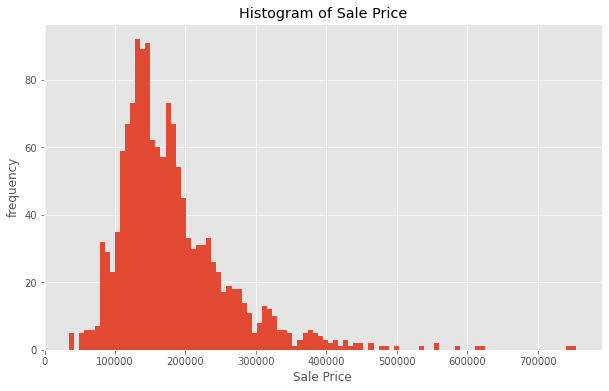

In [6]:
fig = plt.figure(figsize=(10,6))
plt.ylabel('frequency')
plt.xlabel('Sale Price',)
plt.title('Histogram of Sale Price')
y.hist(bins=100)
plt.show()

# Visualization of Sale price for binary categorical variables


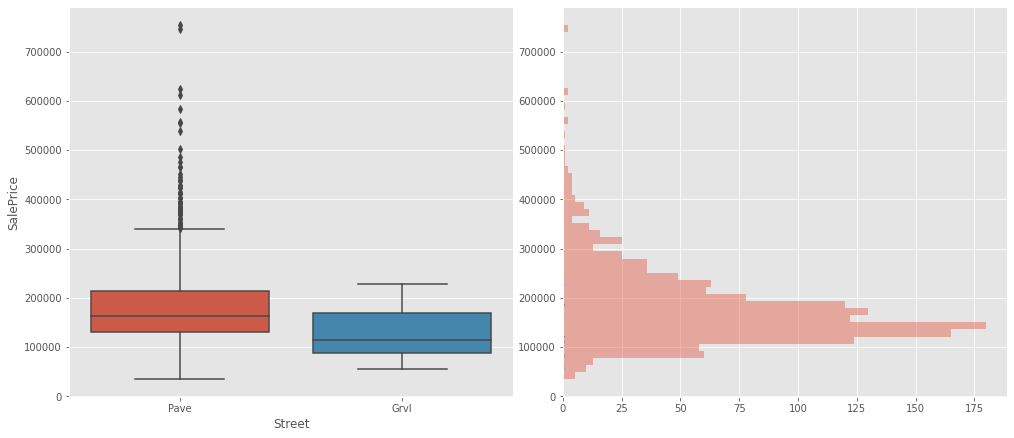

In [7]:
import matplotlib.gridspec as gridspec
import seaborn as sns

Street_Pave = y[X.Street == 'Pave']
Street_Grvl = y[X.Street == 'Grvl']
# CentralAir_Y = y[X.CentralAir == 'Y']
# CentralAir_N = y[X.CentralAir == 'N']

fig = plt.figure(figsize=(14, 6))
gs = gridspec.GridSpec(1, 2)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
sns.boxplot(y=y, x=X.Street, ax=ax1)
ylim = ax1.get_ylim()
hist_kwargs = dict(orientation='horizontal', bins=50, ax=ax2)
Street_Pave.hist(alpha=0.4, **hist_kwargs)
Street_Grvl.hist(alpha=0.6, **hist_kwargs)
ax2.set_ylim((ylim[0], ylim[1]))
for tick in ax2.yaxis.get_major_ticks():
    tick.label1On = False
    tick.label2On = False
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=0)
plt.show()

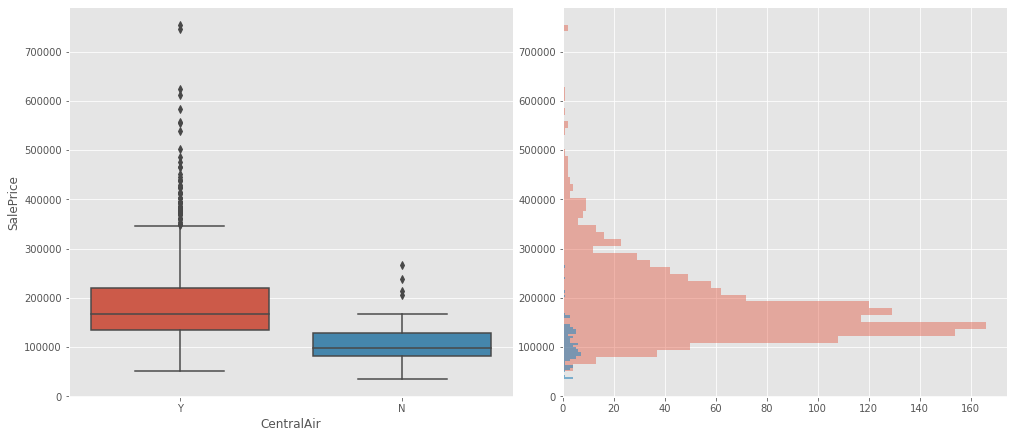

In [8]:
CentralAir_Y = y[X.CentralAir == 'Y']
CentralAir_N = y[X.CentralAir == 'N']

fig = plt.figure(figsize=(14, 6))
gs = gridspec.GridSpec(1, 2)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
sns.boxplot(y=y, x=X.CentralAir, ax=ax1)
ylim = ax1.get_ylim()
hist_kwargs = dict(orientation='horizontal', bins=50, ax=ax2)
CentralAir_Y.hist(alpha=0.4, **hist_kwargs)
CentralAir_N.hist(alpha=0.6, **hist_kwargs)
ax2.set_ylim((ylim[0], ylim[1]))
for tick in ax2.yaxis.get_major_ticks():
    tick.label1On = False
    tick.label2On = False
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=0)
plt.show()

# Visualization of Sale price for Non-binary categorical variables


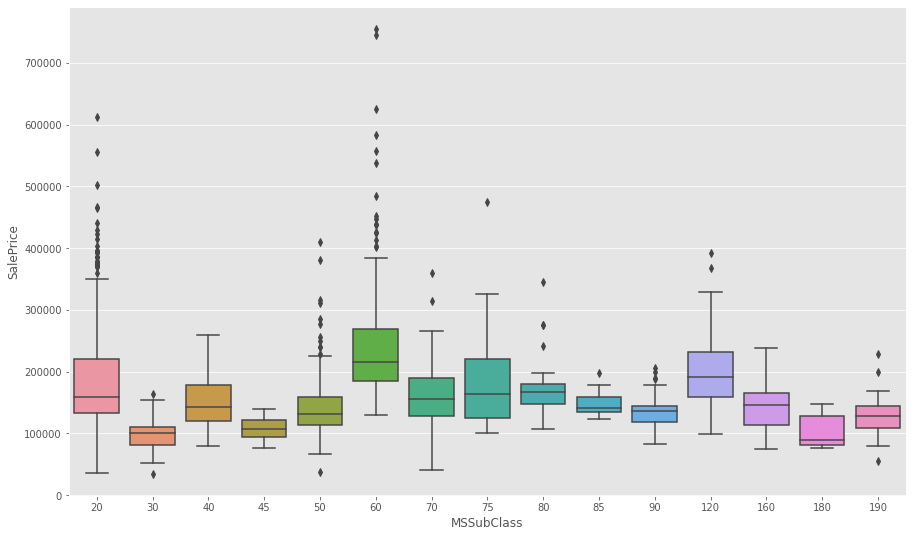

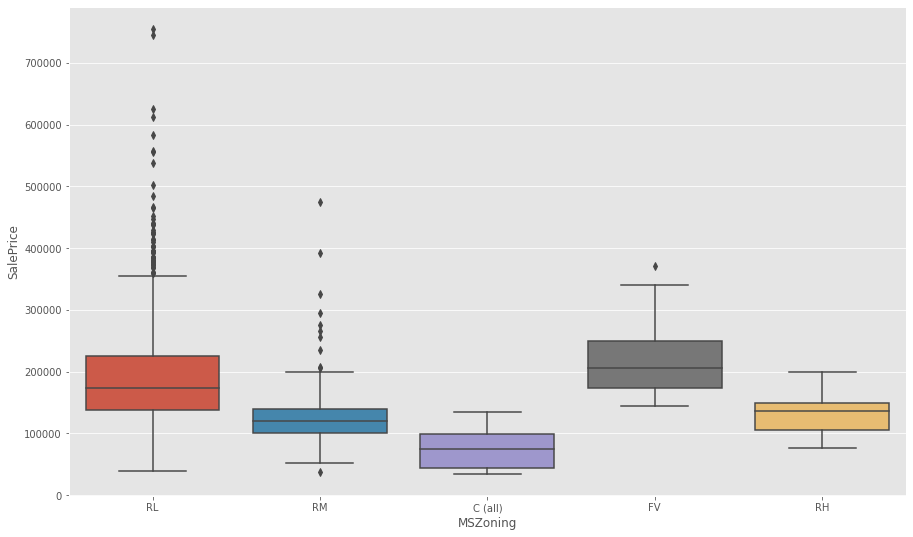

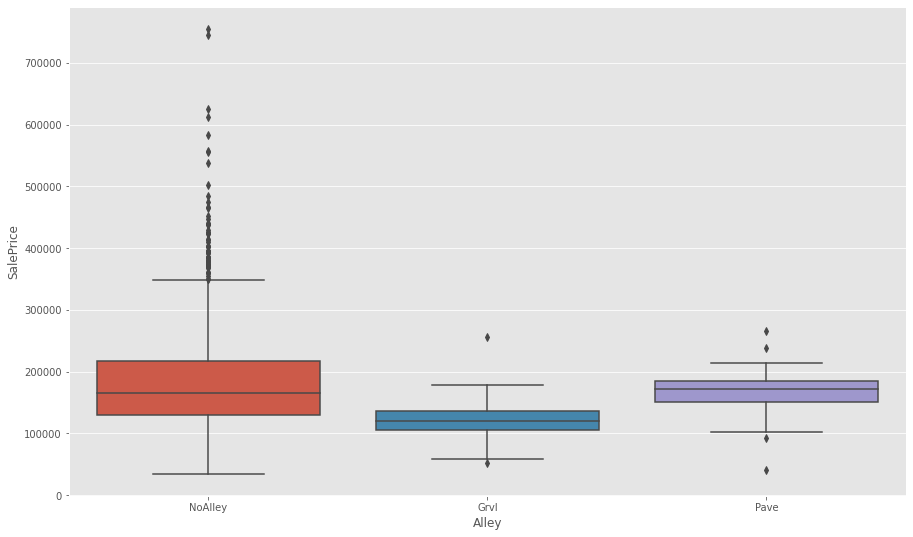

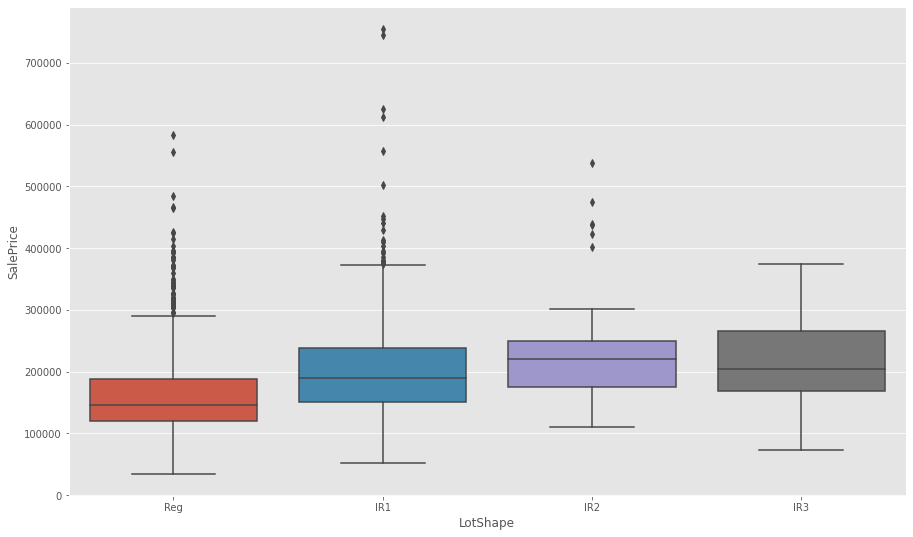

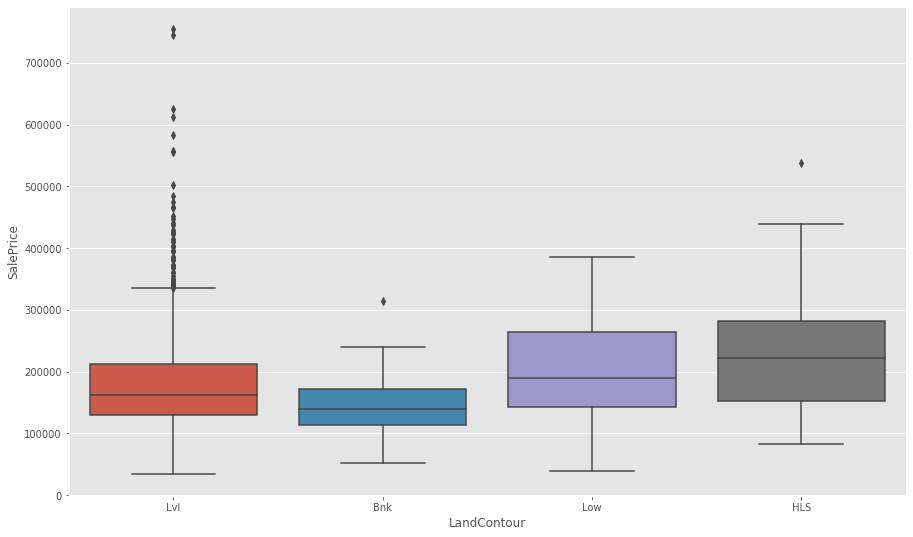

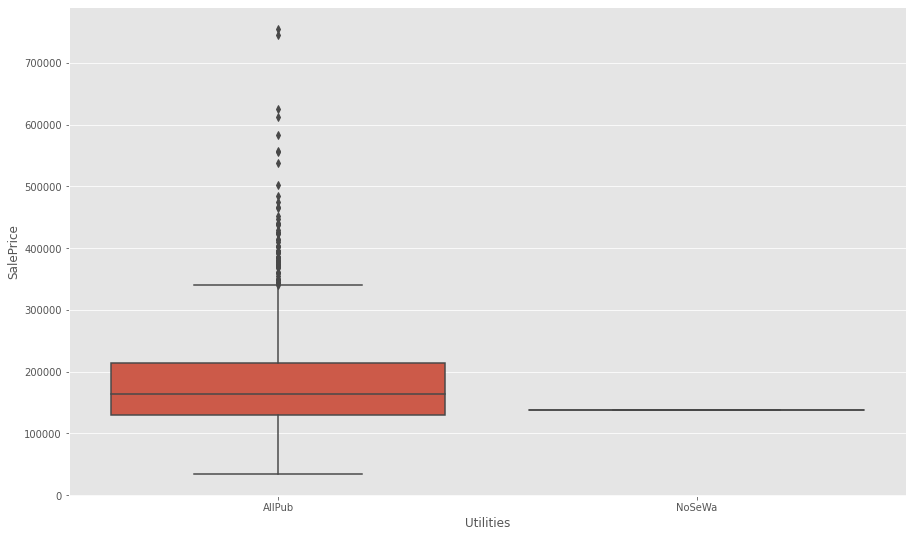

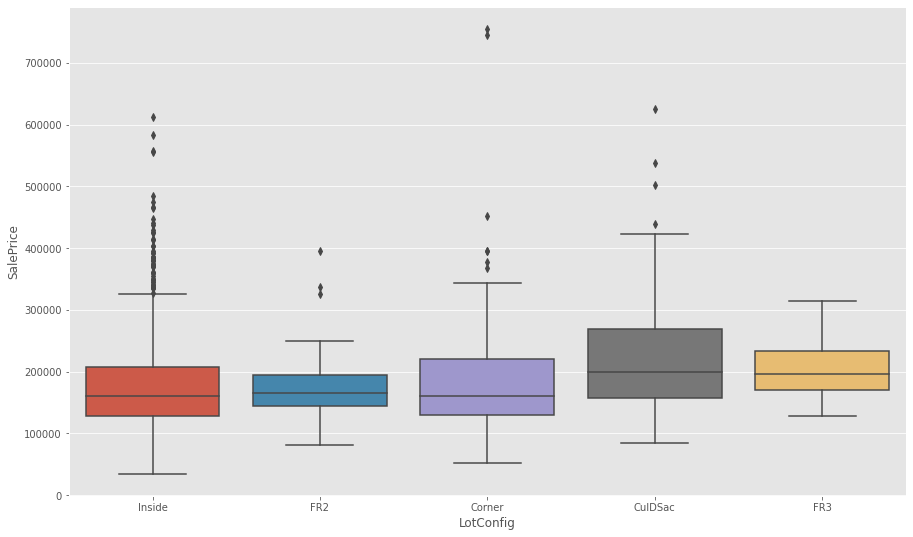

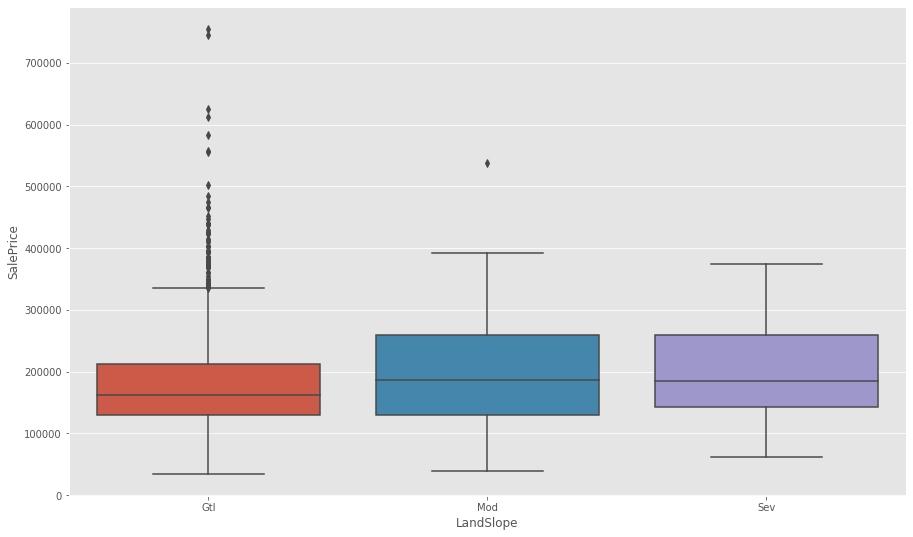

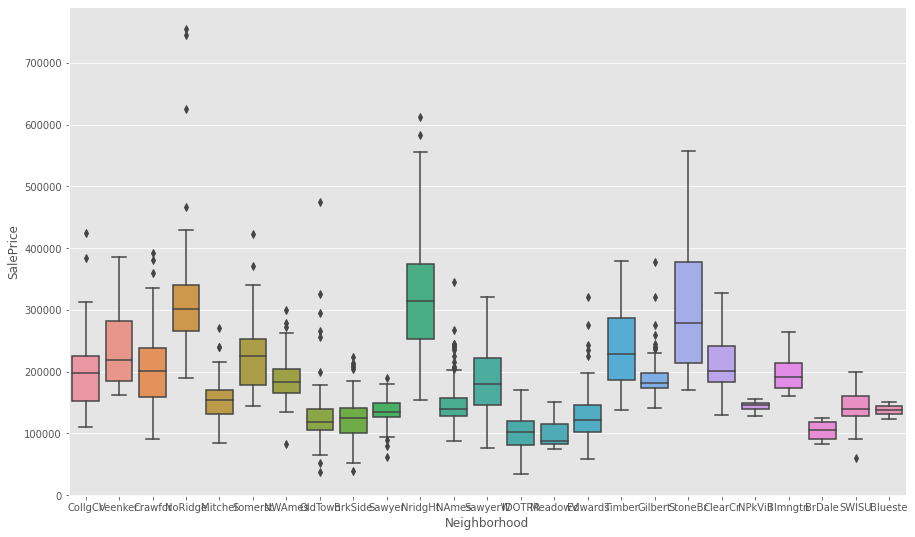

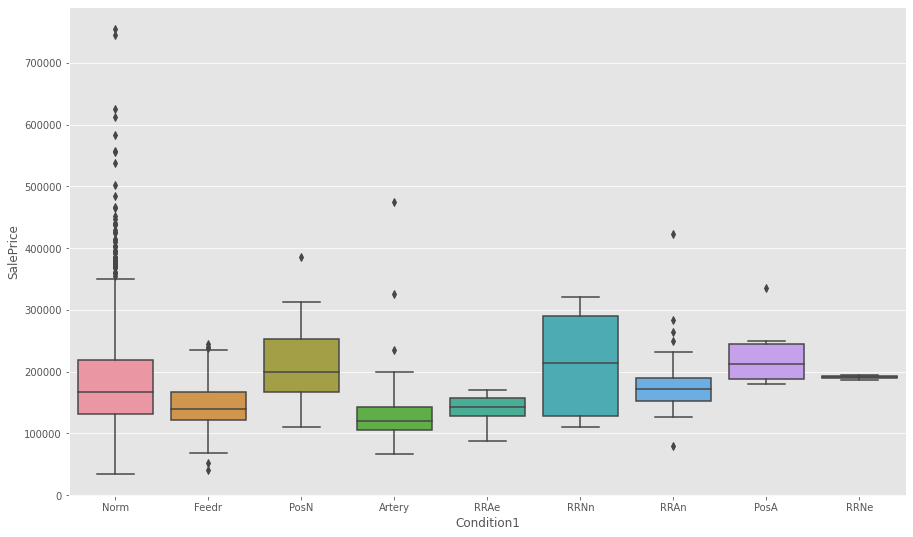

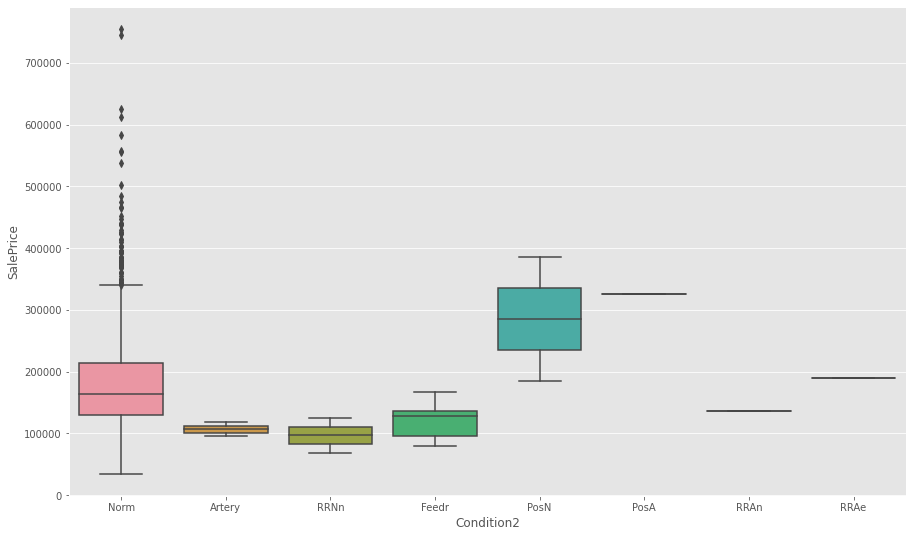

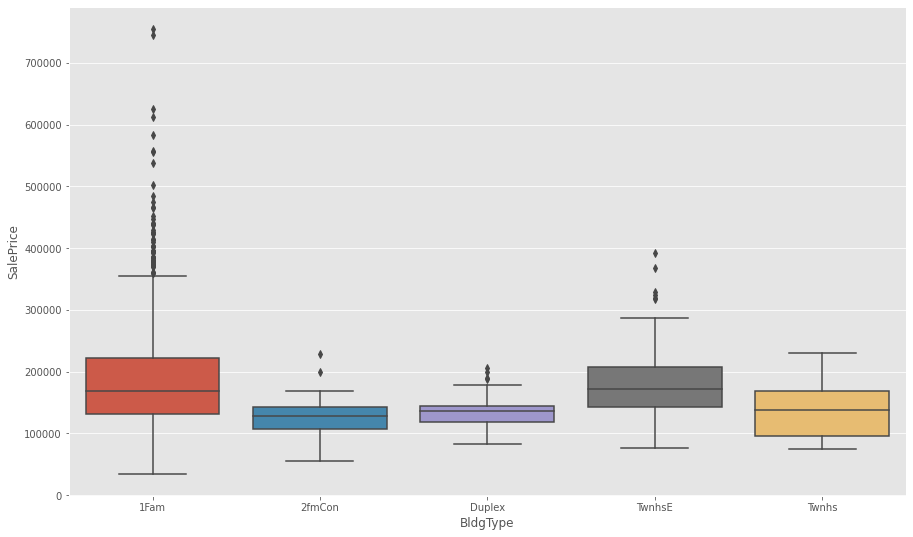

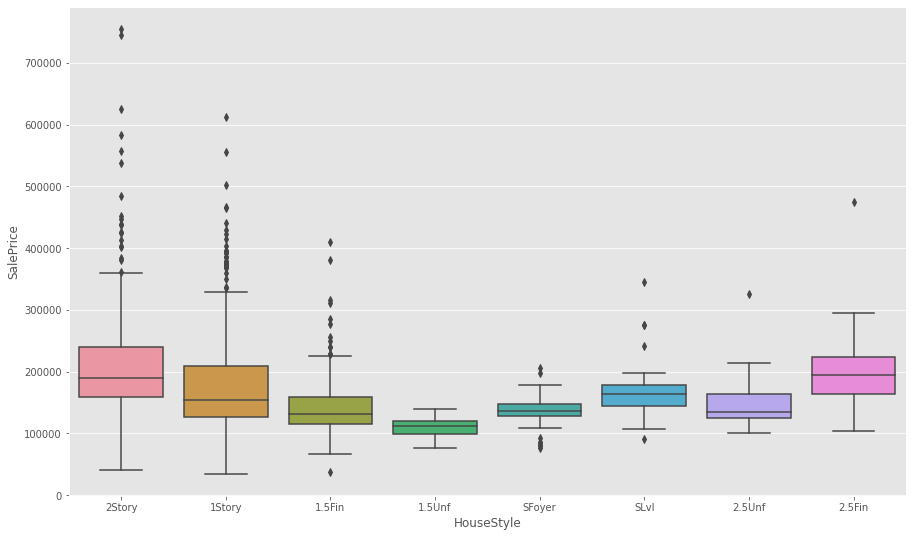

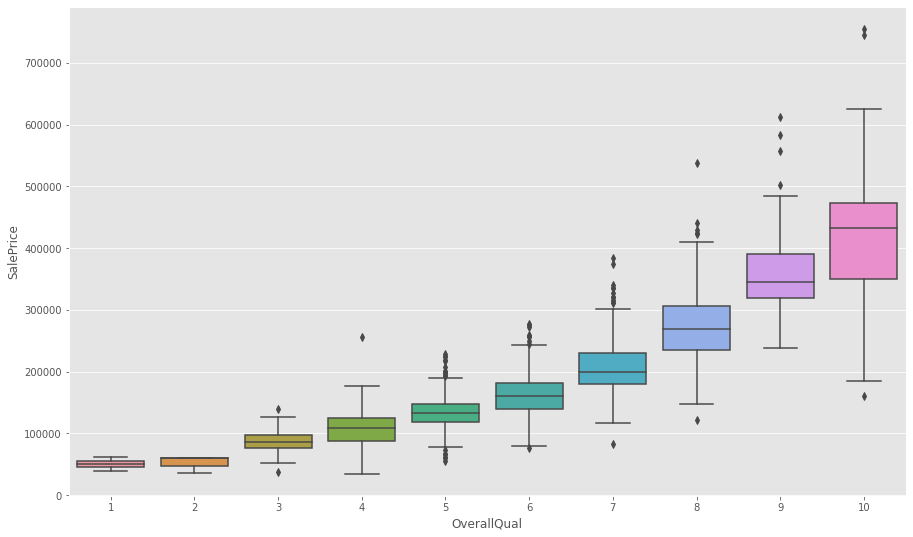

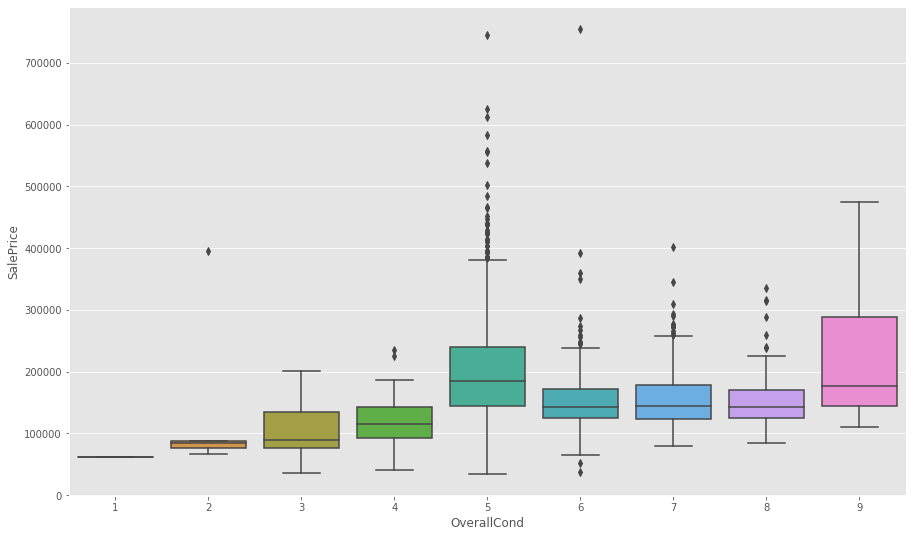

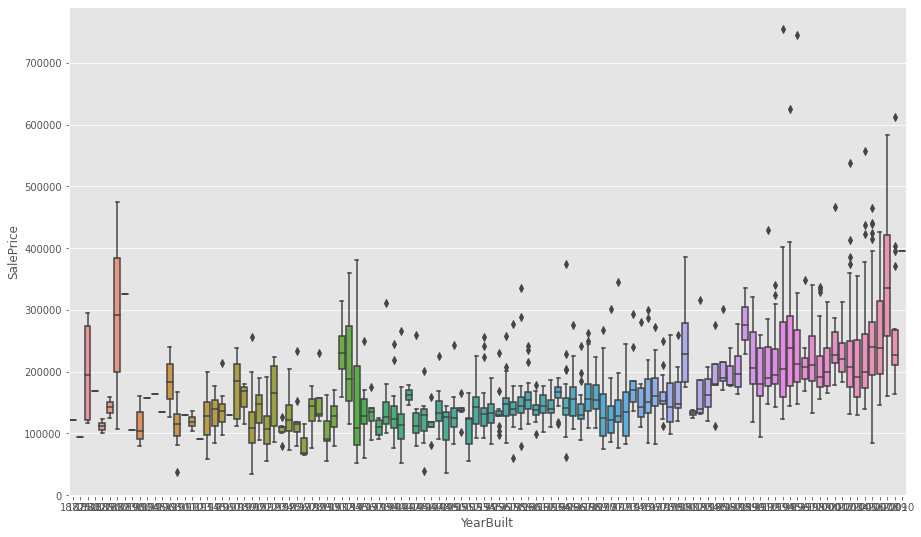

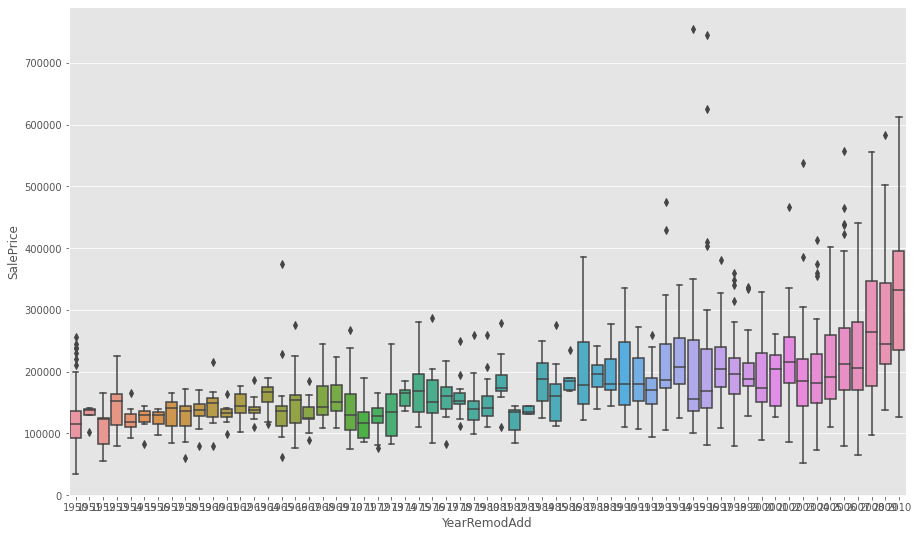

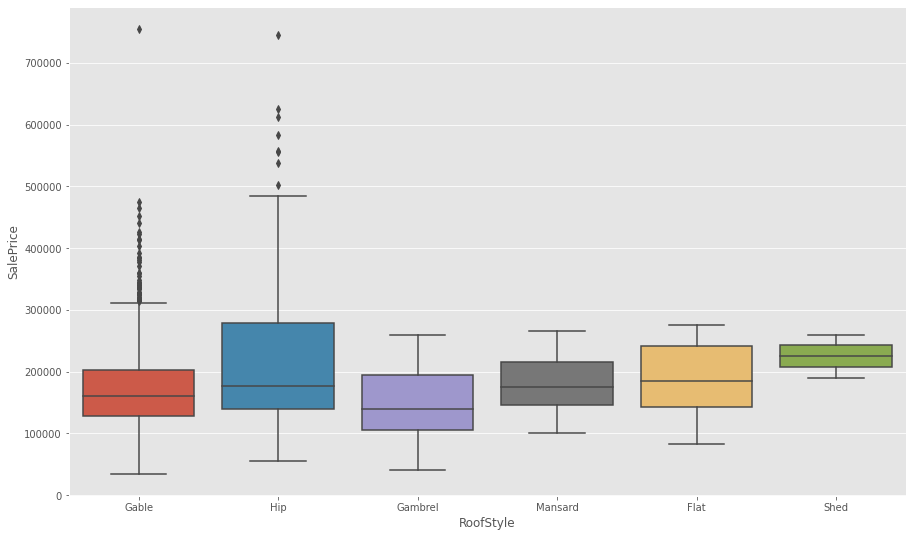

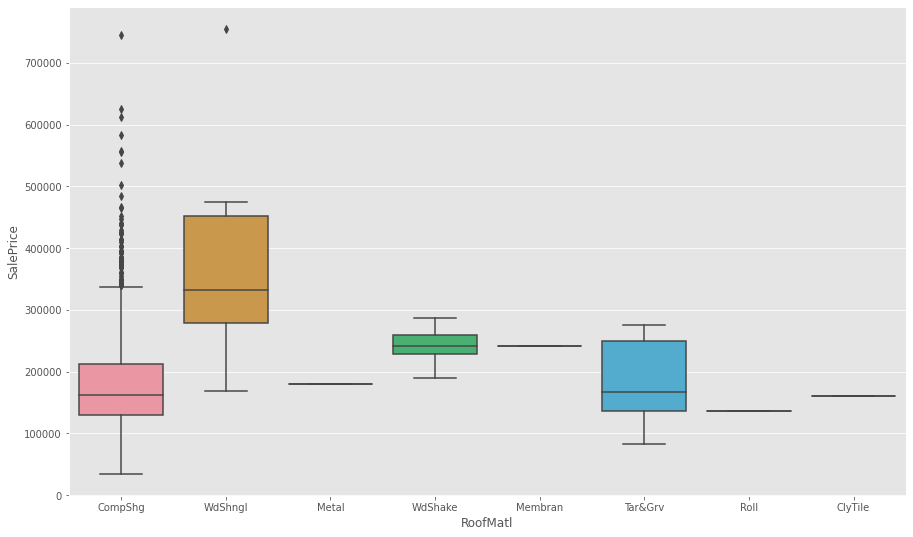

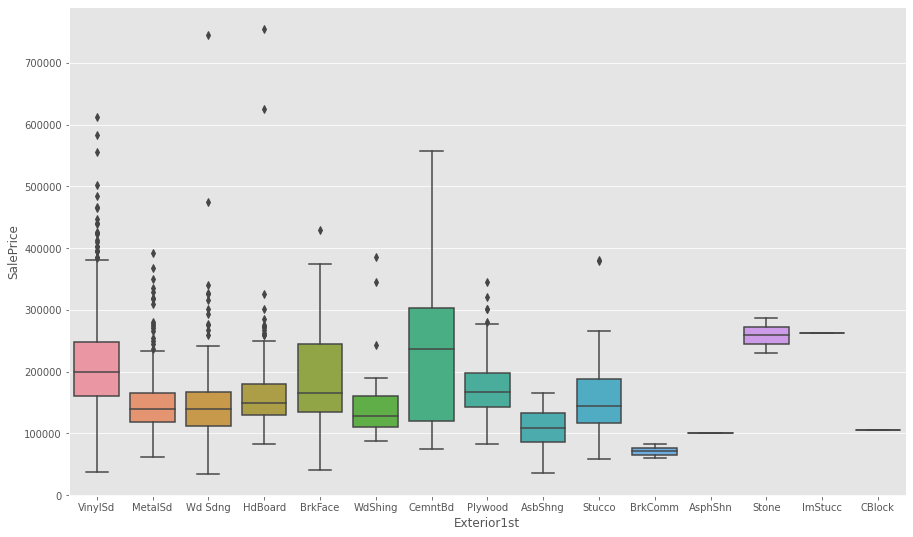

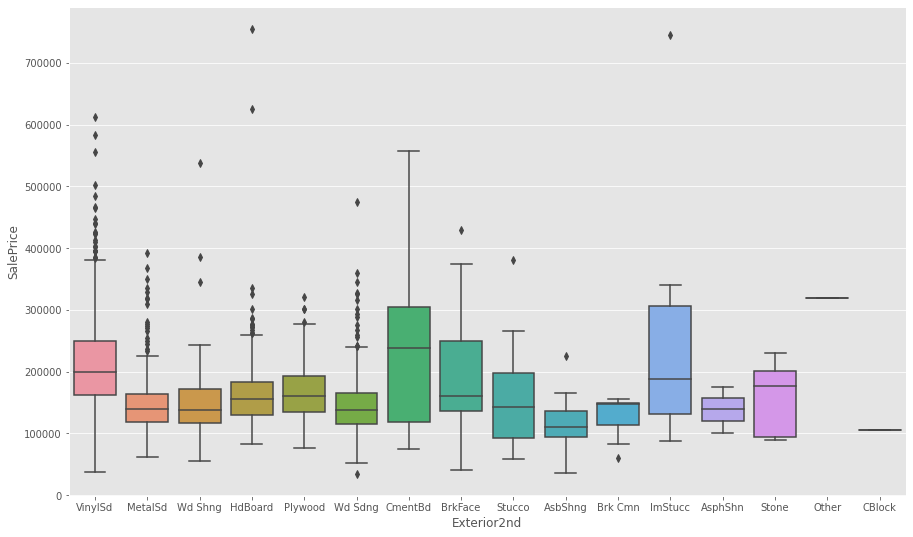

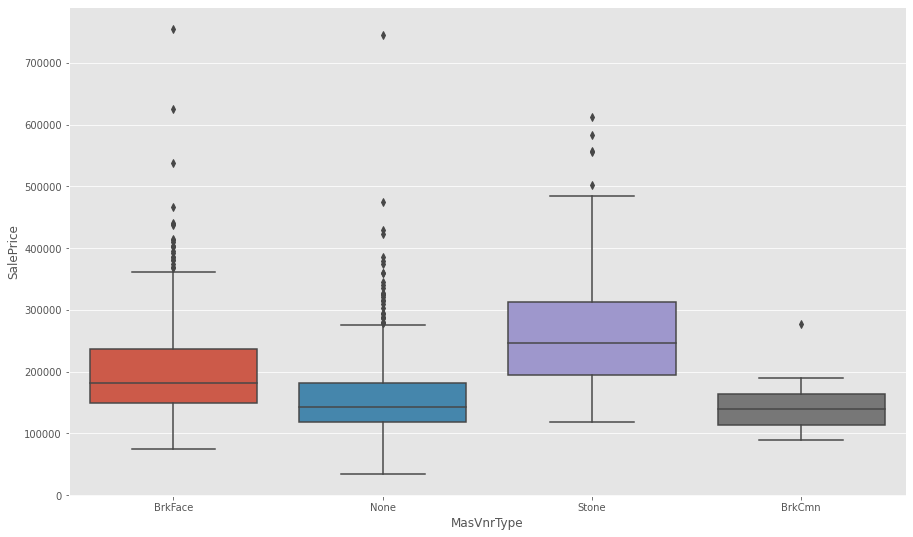

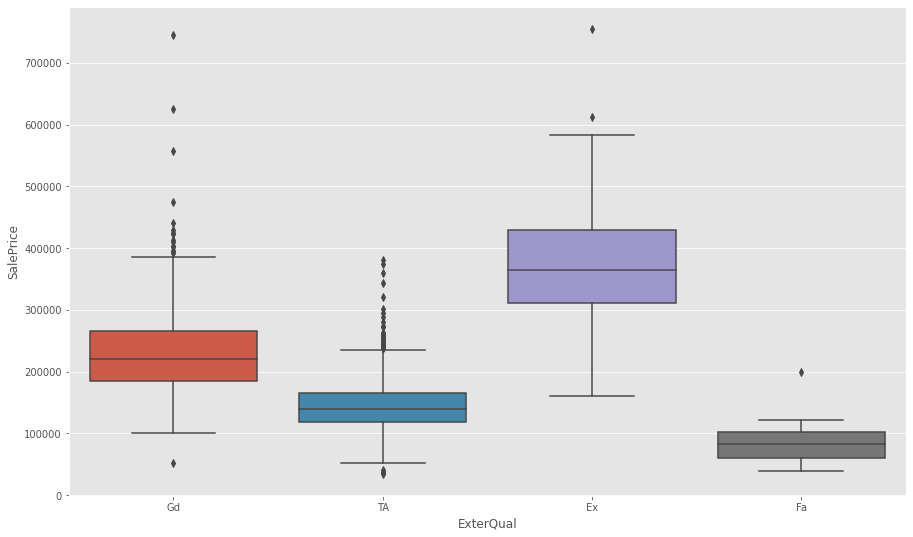

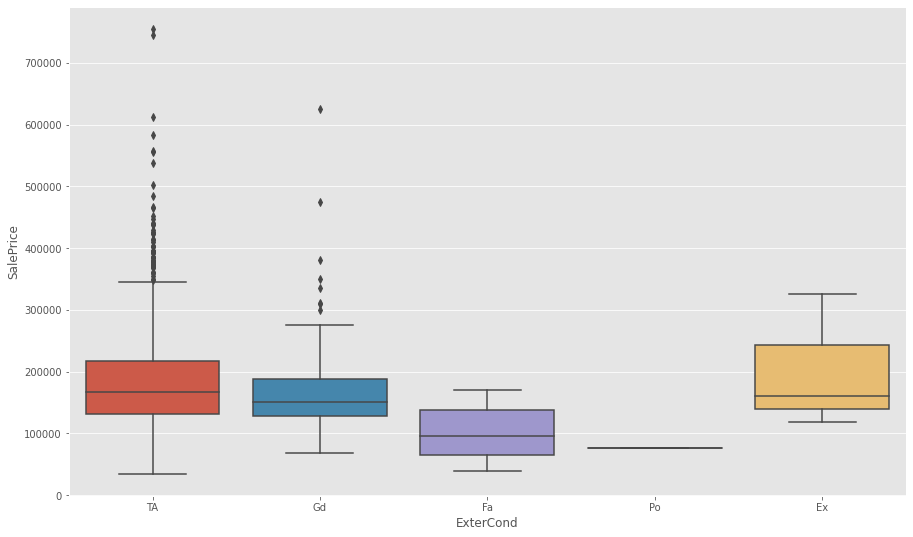

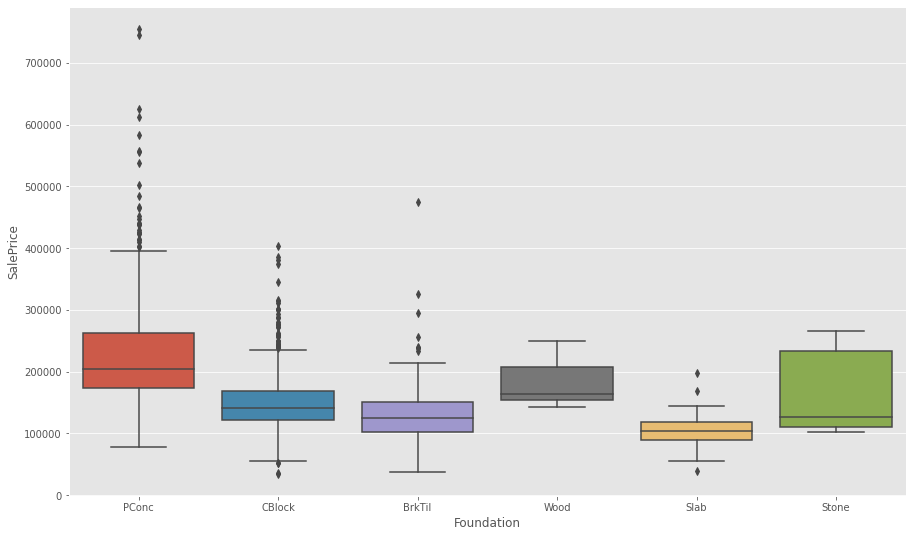

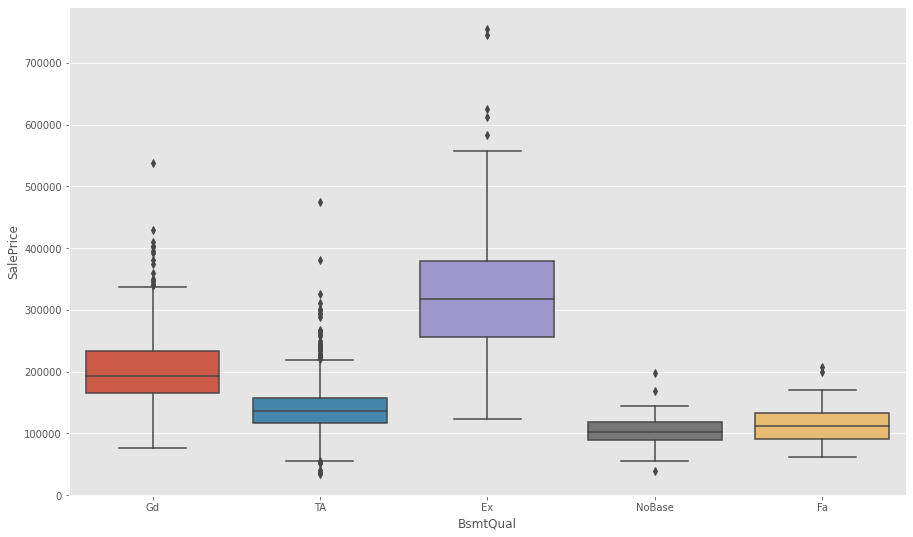

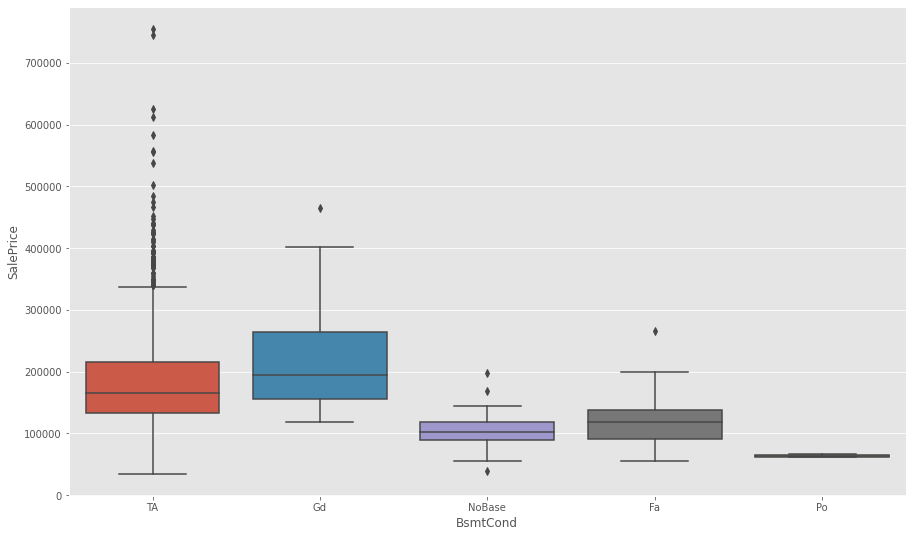

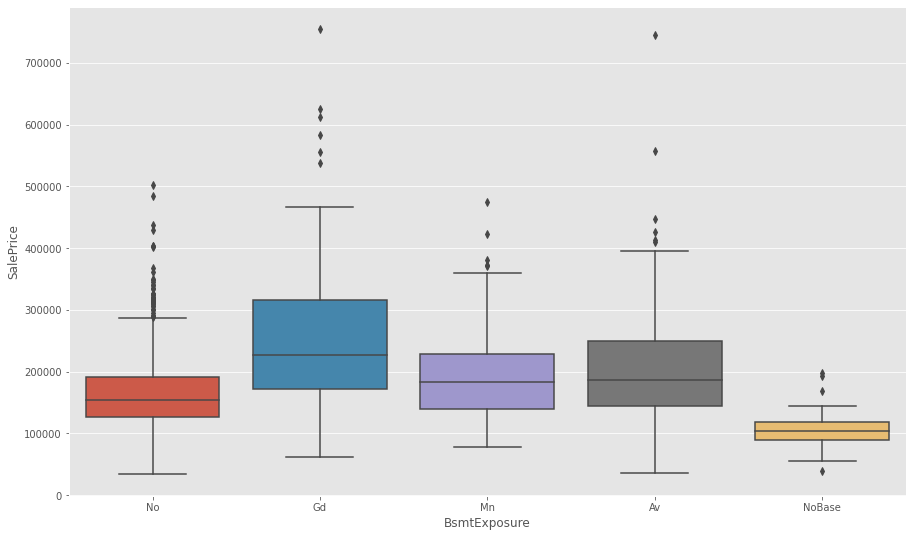

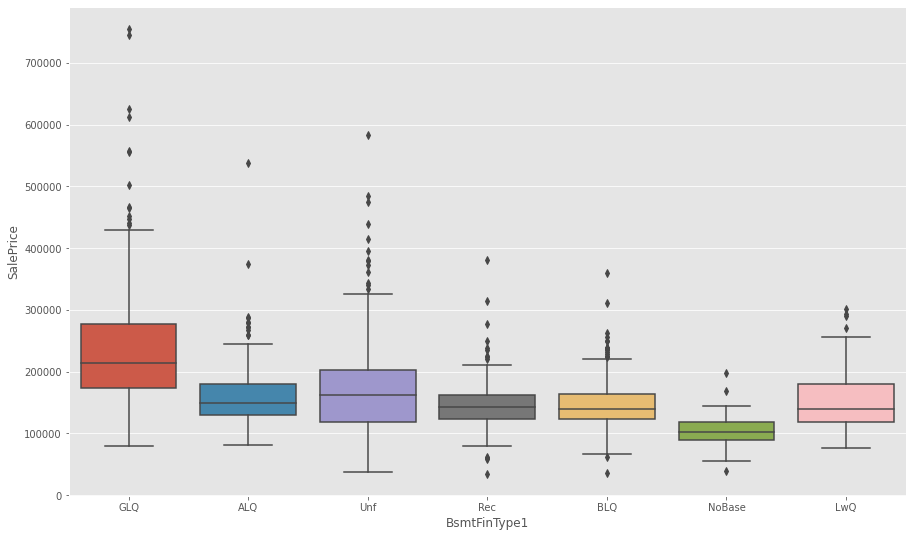

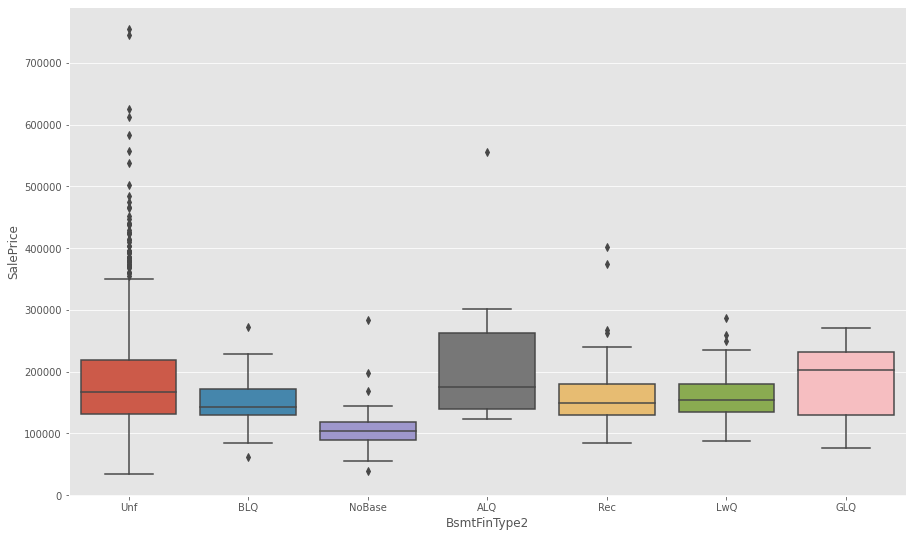

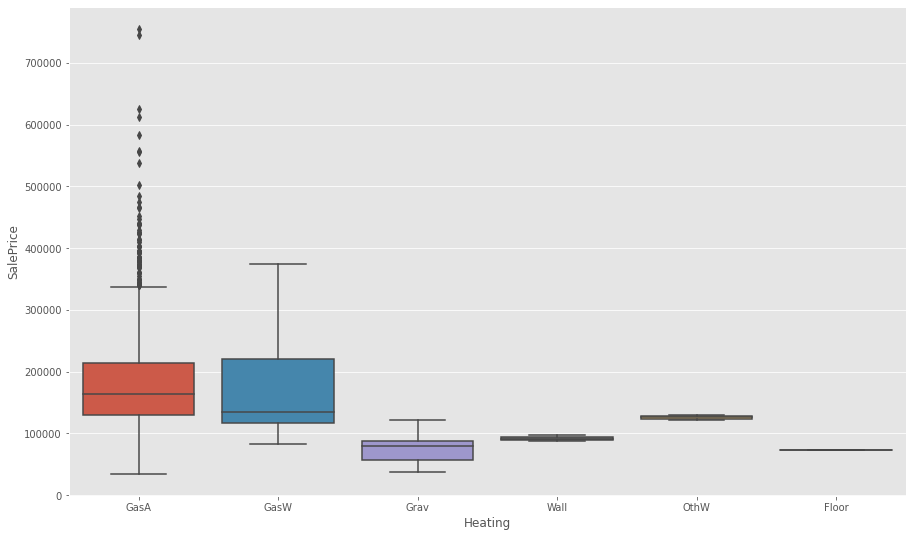

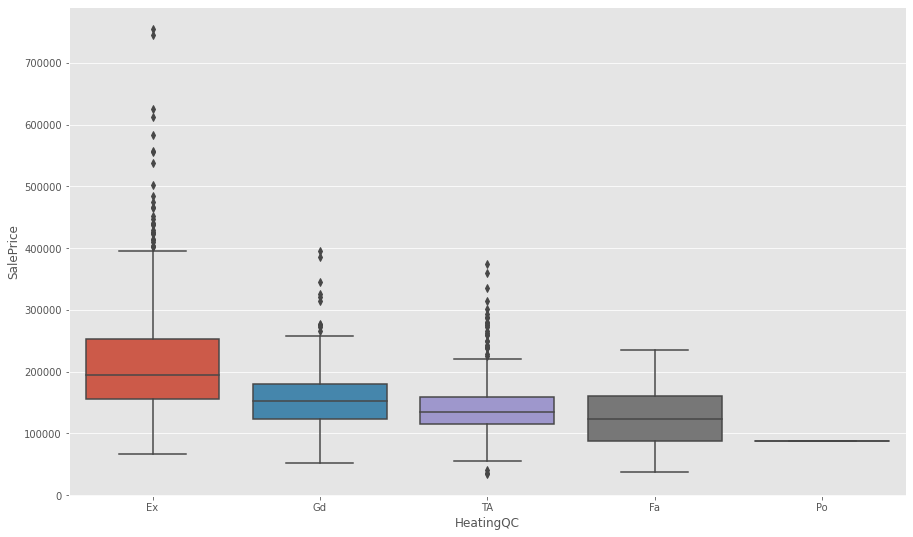

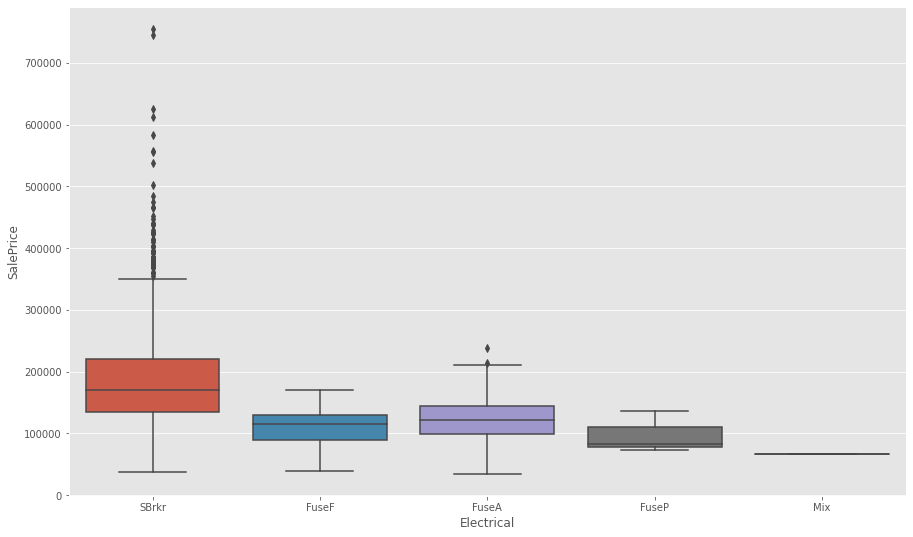

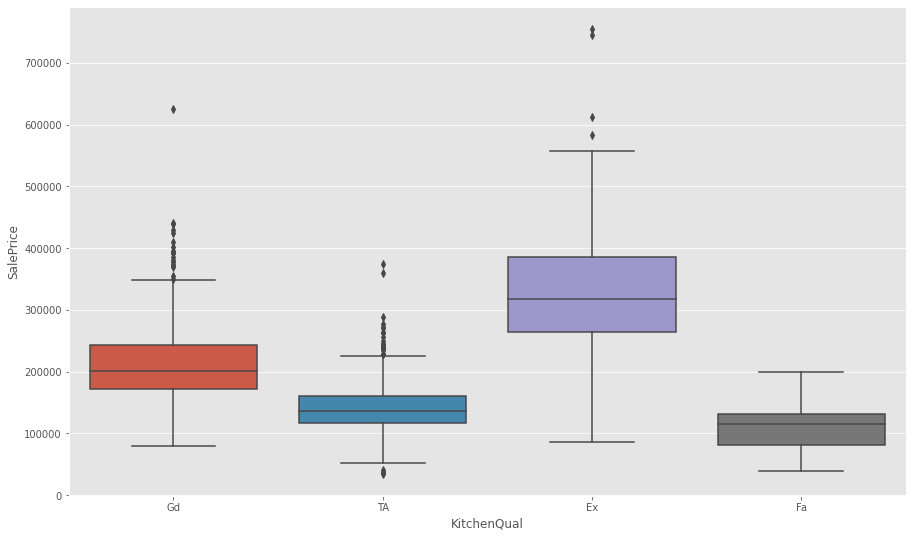

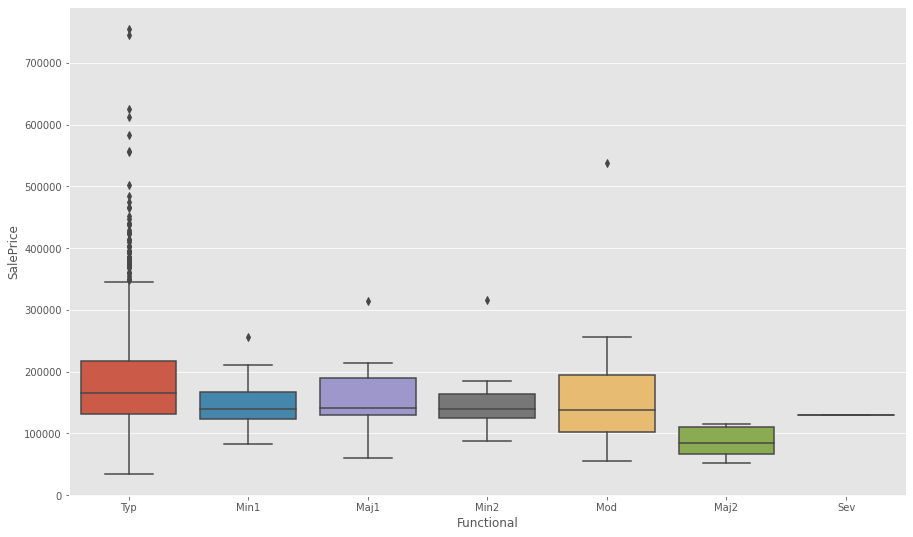

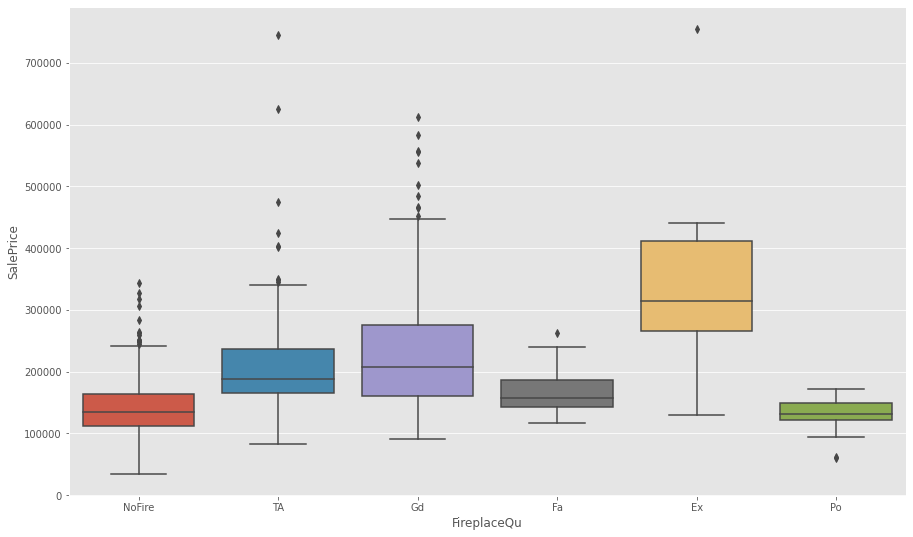

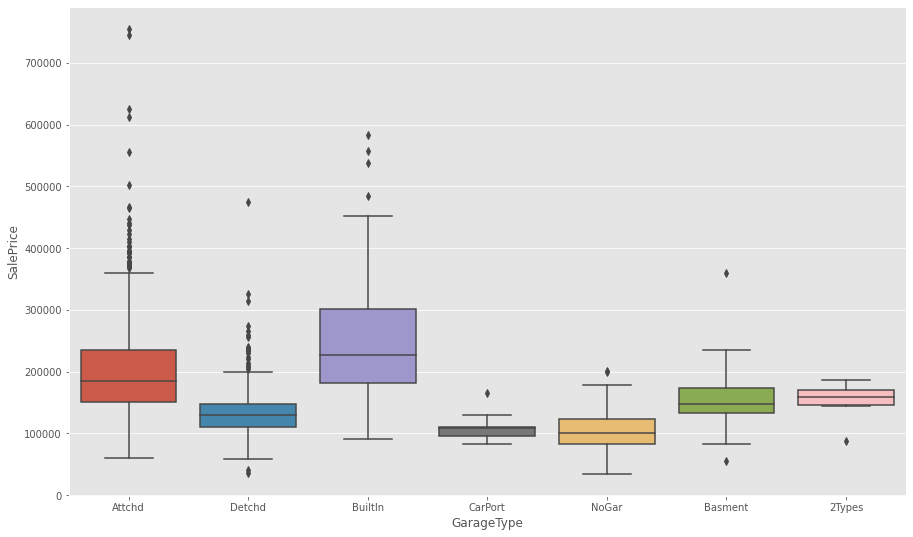

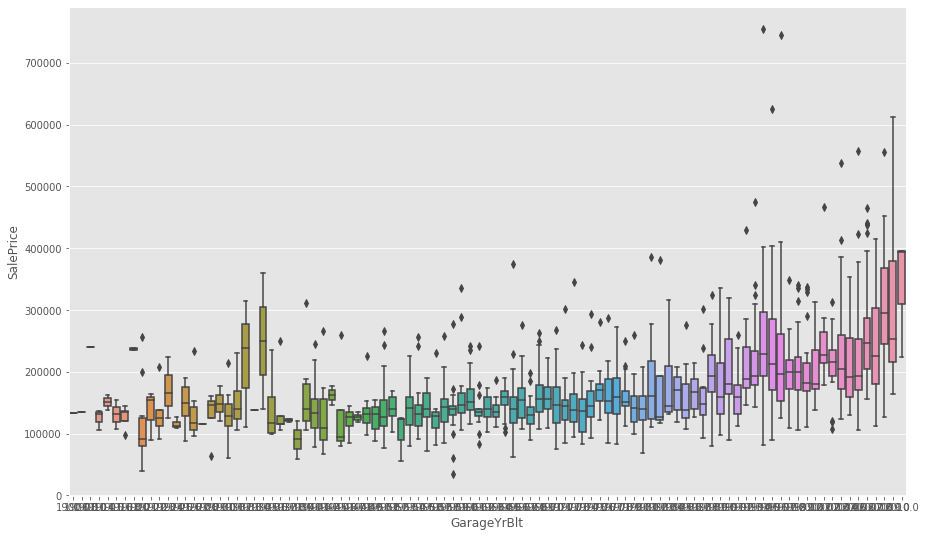

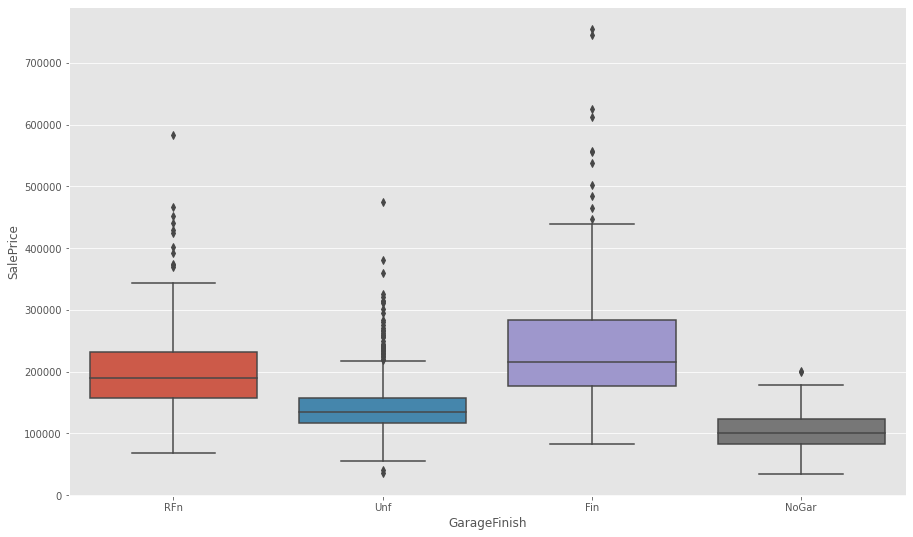

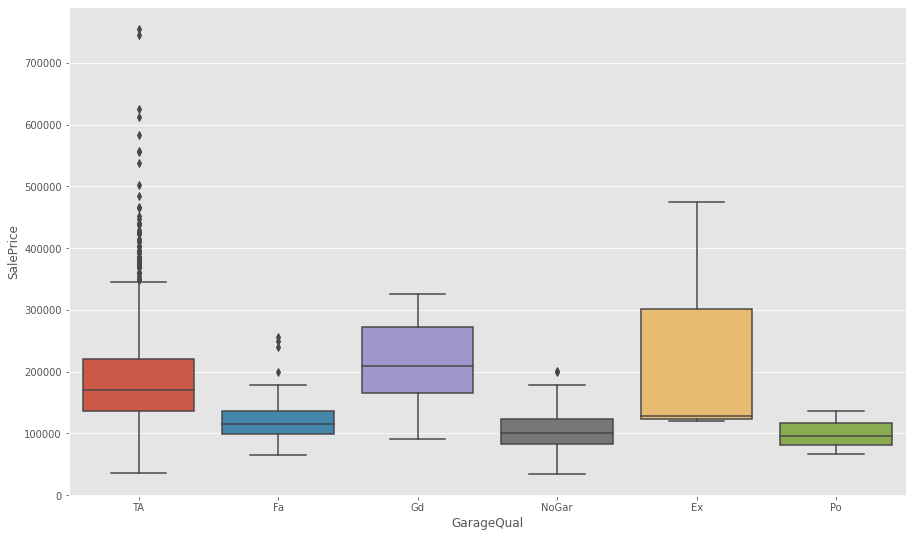

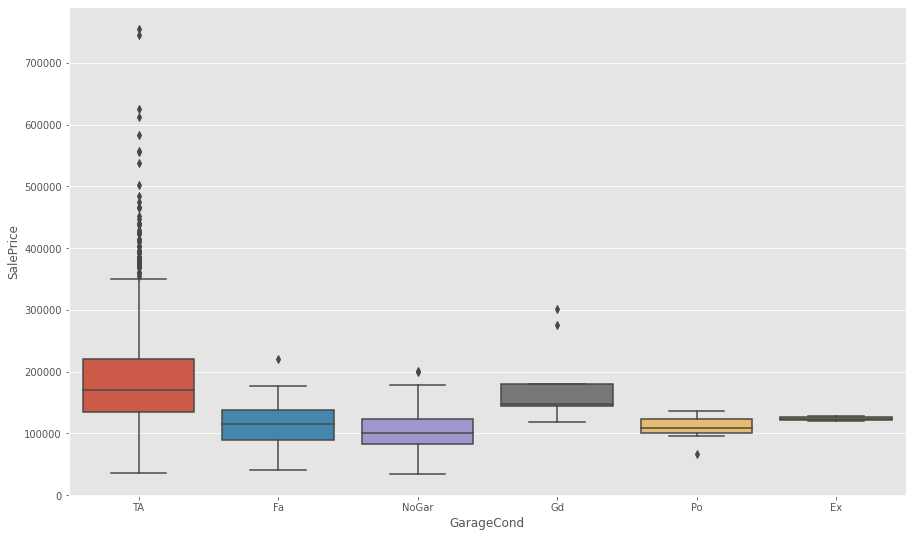

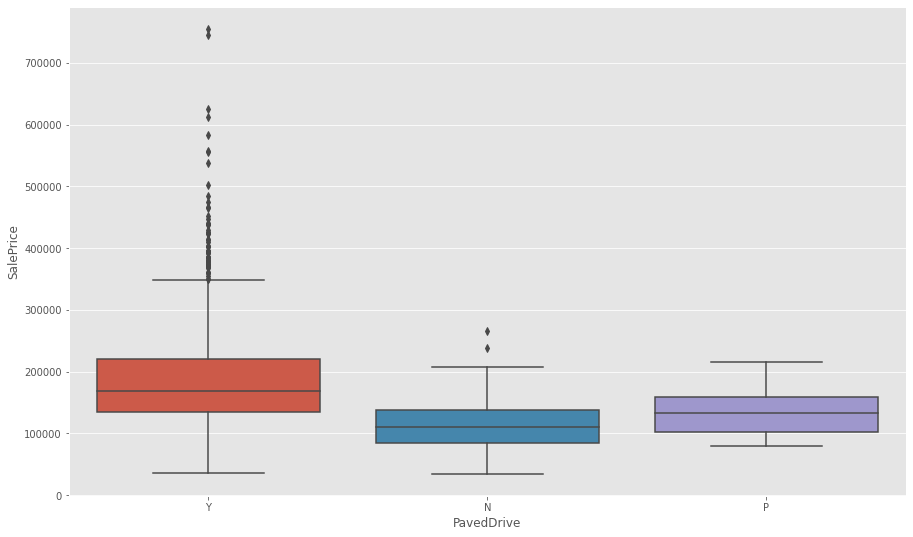

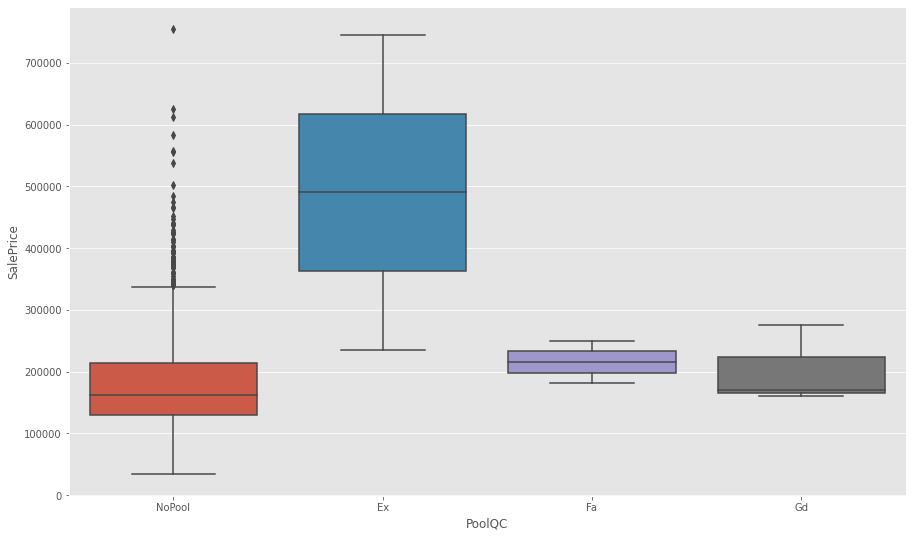

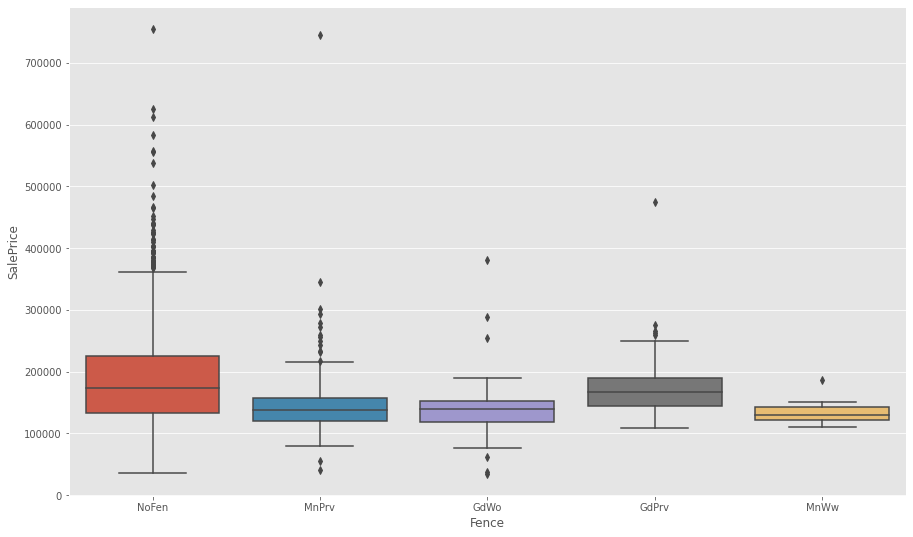

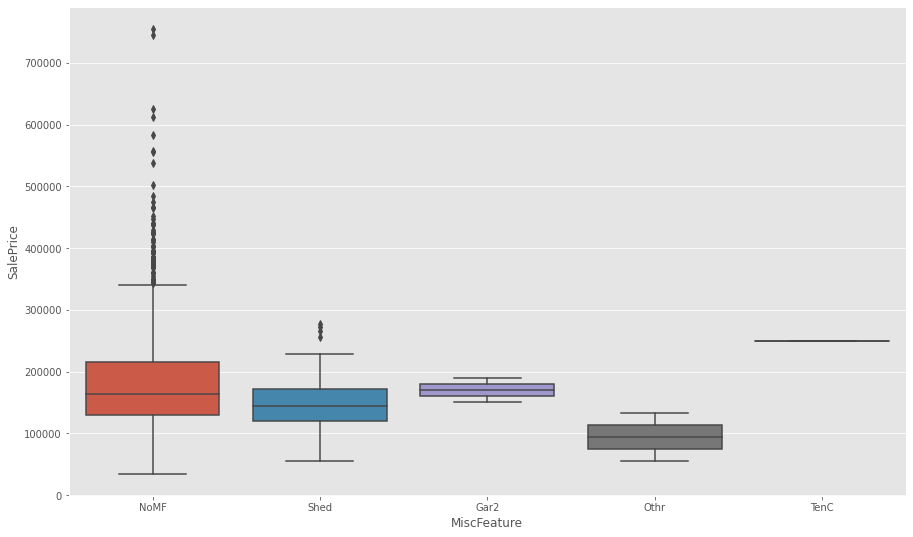

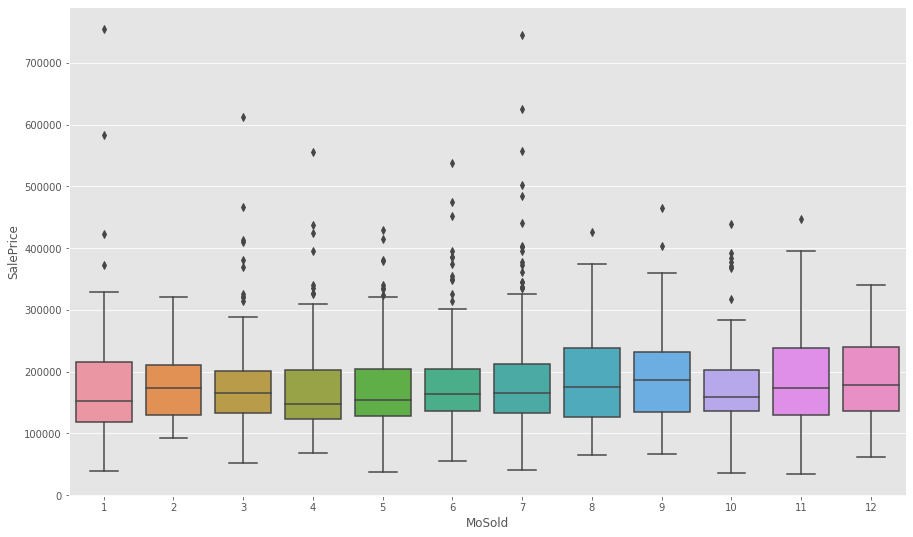

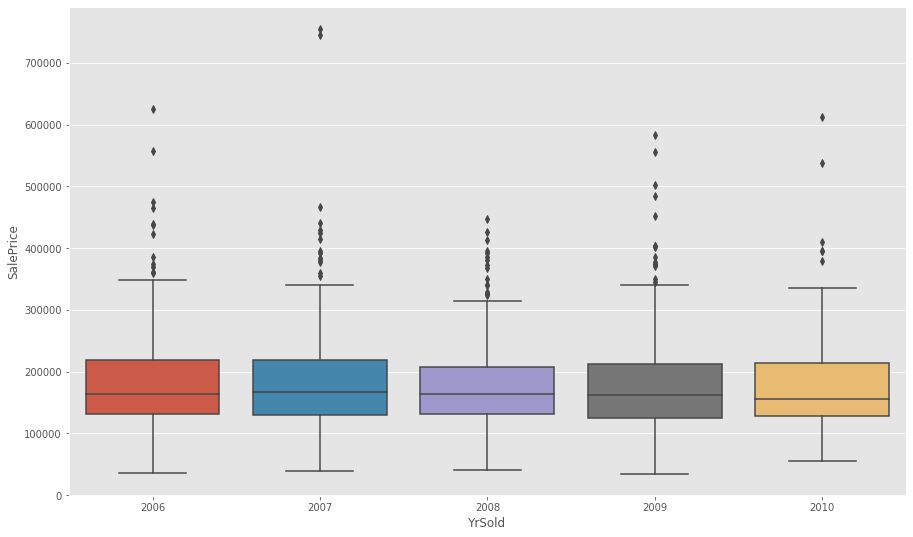

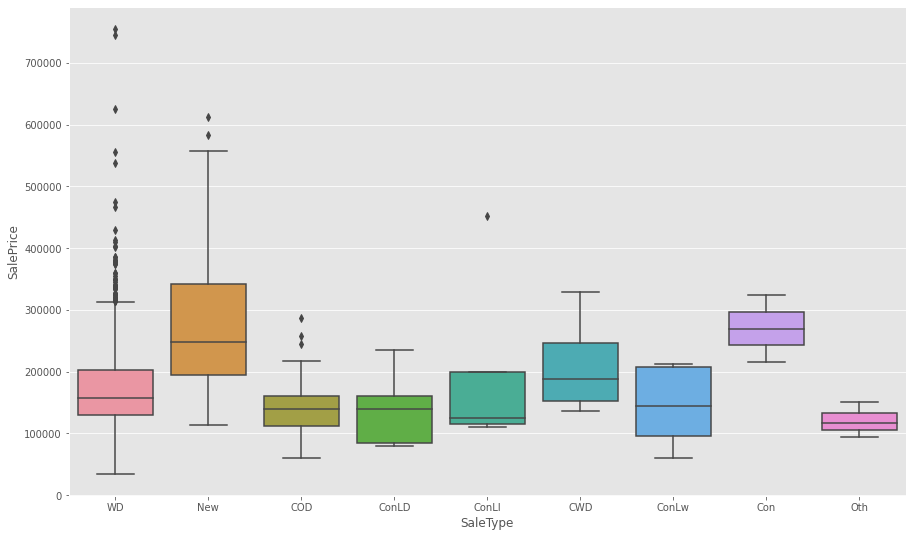

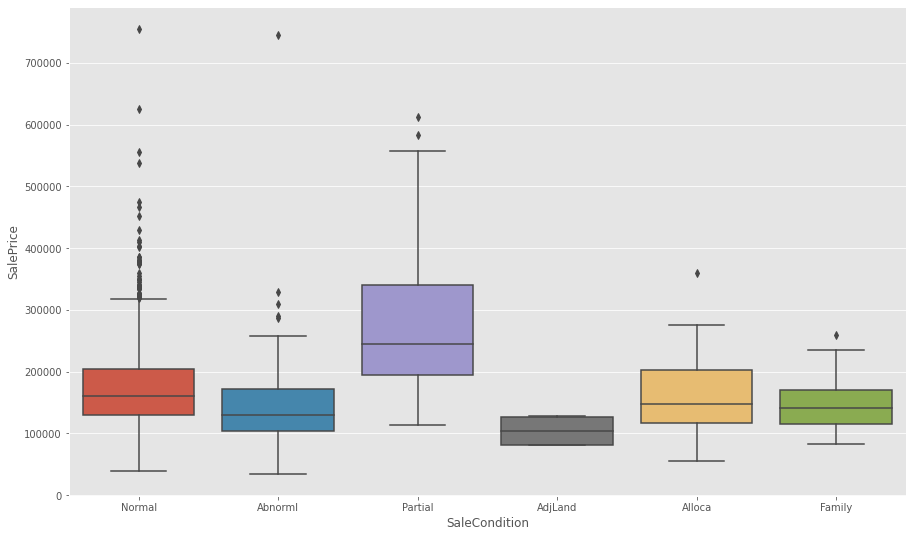

In [9]:
for variable in categorical_X.columns:
    if variable == 'Street' or variable == 'CentralAir':
        continue
    else:
        fig = plt.figure(figsize=(15, 9))
        sns.boxplot(y=y, x=categorical_X[variable])
        plt.show()


# Distribution of the continuous attributes and their relationship to housing values

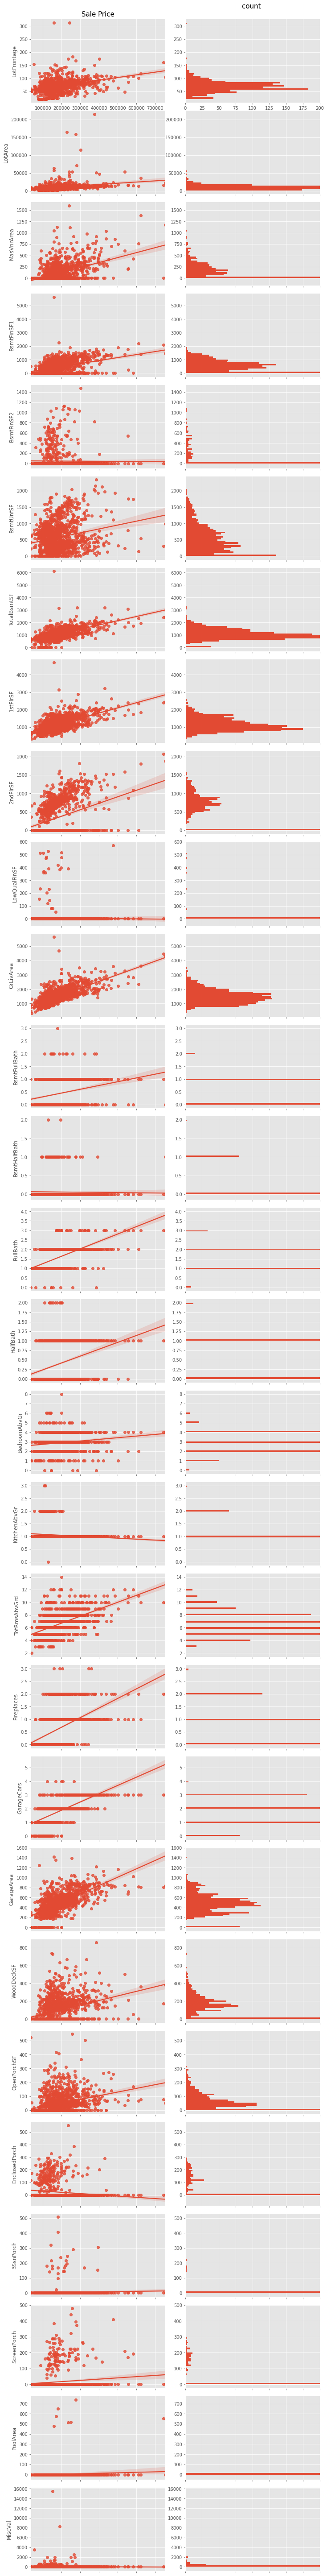

In [10]:
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(10, 80))
gs = gridspec.GridSpec(28, 2)

for i in range(28):
    ax1 = plt.subplot(gs[i, 0])
    ax2 = plt.subplot(gs[i, 1])    
    sns.regplot(y, continuous_X.iloc[:, i], ax=ax1)
    ax1.set_title('')
    ax1.set_xlabel('')
    ylim = ax1.get_ylim()   
    continuous_X[continuous_X.columns[i]].hist(bins=50, ax=ax2, orientation='horizontal')    
    ax2.set_ylim((ylim[0], ylim[1]))
    ax2.set_xlabel('')
    ax2.set_xlim((0, 200))
    for tick in ax2.yaxis.get_major_ticks():
        tick.label1On = False
        tick.label2On = True
    if i != 0:
        ax1.set_xticklabels([''])
        ax2.set_xticklabels([''])
    else:
        ax1.set_title('Sale Price', size=15)
        ax2.set_title('count \n', size=15)
        for tick in ax1.xaxis.get_major_ticks():
            tick.label1On = False
            tick.label2On = True
        for tick in ax2.xaxis.get_major_ticks():
            tick.label1On = False
            tick.label2On = True
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.show()